# INSTITUTO POLITÉCNICO NACIONAL

---

## Aplicaciones de lenguaje Natural


### Practica 1

* Felipe Sanchez Martinez

El siguiente código muestra la aplicación del preprocesamiento hasta la creación de la BoW, por lo tanto lo creo apartir de una frase cualquiera y eso cambia al hacerlo completamente en un dataset

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

!pip install Pillow
from PIL import Image
from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

!pip install stanza
import stanza
stanza.download('es')

import spacy
!python -m spacy download es_core_news_sm


from sklearn.feature_extraction.text import TfidfVectorizer

ModuleNotFoundError: No module named 'wordcloud'

## Cleaning

In [ ]:
def cleanData(sentence):
    sentence_cleaned = re.sub(r'<.*?>', '', sentence)
    sentence_cleaned = re.sub(r'[*_]', '', sentence_cleaned)
    sentence_cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', sentence_cleaned)
    return sentence_cleaned

## Tokenize:

In [ ]:
def tokenize(sentence):
    tokens = nltk.word_tokenize(sentence)
    return tokens

## Normalize:

### Deleting puntuation marks and stopwords

In [ ]:
def deleteStopWords(tokens):
  stopwrds = set(stopwords.words(('english','spanish')))
  deleted = [token for token in tokens if token.lower() not in stopwrds]
  return deleted

In [ ]:
def deletePunctuationMarks(tokens):
    deleted = [token for token in tokens if token.isalpha()]
    return deleted

In [ ]:
def makeLowerCase(tokens):
    lower = [token.lower() for token in tokens]
    return lower

## Lemmatize

In [ ]:
def lemmatize(tokens):
    lemmatizer = spacy.load('es_core_news_sm')
    tokens_with_lemmatizer = [lemmatizer(token) for token in tokens]
    return tokens_with_lemmatizer

## Stemming

In [ ]:
def stemming(tokens):
  stemmer = SnowballStemmer('spanish')
  stems = [stemmer.stem(token) for token in tokens]
  return stems

## Text Preprocessing

In [ ]:
def makePreprocessing(df_column, function_for_root_word):
  df_column = df_column.apply(cleanData)
  df_column = df_column.apply(tokenize)
  df_column = df_column.apply(makeLowerCase)
  df_column = df_column.apply(deleteStopWords)
  df_column = df_column.apply(deletePunctuationMarks)
  df_column = df_column.apply(function_for_root_word)
  return df_column


# Sentiment Analysis in Spanish

In [2]:
df = pd.read_csv("/content/sentiment_analysis_dataset.csv")
df.describe()
df.to_csv('clean_data.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/sentiment_analysis_dataset.csv'

In [194]:
df['text'] = makePreprocessing(df['text'], stemming)
df

,user,text,date,emotion,sentiment
0,@erreborda,"[termin, bien, abrum, despus, hoy]","Jan 6, 2024 · 2:53 AM UTC",overwhelmed,scared
1,@shpiderduck,"[sient, abrum]","Jan 6, 2024 · 2:35 AM UTC",overwhelmed,scared
2,@Alex_R_art,"[sient, abrum, cantid, cos, quier, dibuj, ver,...","Jan 6, 2024 · 12:20 AM UTC",overwhelmed,scared
3,@anggelinaa97,"[salvador, nic, person, abrum, version, nadiec...","Jan 5, 2024 · 10:38 PM UTC",overwhelmed,scared
4,@diegoreyesvqz,"[denm, hel, ando, full, abrum]","Jan 5, 2024 · 8:38 PM UTC",overwhelmed,scared
...,...,...,...,...,...
2585,@lavivianaleyva,"[pod, viv, mied, manej, borrach, dej, usar, ci...","Jan 6, 2024 · 3:08 AM UTC",daring,joyful
2586,@Carmeen_Alicia,"[vid, constant, mied, xit]","Jan 6, 2024 · 3:07 AM UTC",daring,joyful
2587,@homicidios_,"[esquizofreni, ment, divid, mied, realidad, pa...","Jan 6, 2024 · 2:59 AM UTC",daring,joyful
2588,@brigethcoba,"[ms, mied, da, ver, cmo, desaparec, mund, ms, ...","Jan 6, 2024 · 2:55 AM UTC",daring,joyful


## Bag Of Words

In [195]:
 def makeBagOfWords(df_column):
  vocabulary = sorted(set(df_column.explode().astype(str).tolist()))

  aux = {token: 0 for token in vocabulary}


  matrix = []

  for tokens in df_column.tolist():
    data = aux.copy()
    for token in tokens:
      data[token] += 1

    vector = [data[token] for token in vocabulary]
    matrix.append(vector)

  BoW = pd.DataFrame(matrix, columns = vocabulary)
  return BoW



In [197]:
BoW = makeBagOfWords(df['text'])
BoW

,aaaa,aaaaa,aaaaaa,aaaah,aaaj,aaron,abaj,abalanz,abandon,abat,...,zell,zen,zendal,zeus,zon,zoomerian,zor,zurd,zymborsk,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## WordCloud

In [198]:

def createCloud(df_column):
    cloud_mask = np.array(Image.open("/content/ya.png"))

    # Aplicar la transformación a todos los elementos del array
    transformed_cloud_mask = np.where(cloud_mask == 1, 255, cloud_mask)

    wordcloud = WordCloud(background_color="white", max_words=150, mask = transformed_cloud_mask).generate(" ".join(df_column.explode().astype(str).tolist()))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

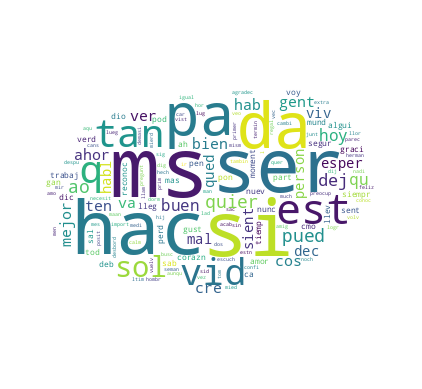

In [199]:
createCloud(df['text'])

## TFIDF

In [200]:
 def makeTFIDF(df_column):
  vectorizer = TfidfVectorizer()
  tokens = df_column.tolist()
  corpus = [' '.join(words) for words in tokens]
  matrix = vectorizer.fit_transform(corpus)
  columns = vectorizer.get_feature_names_out()

  tf_idf = pd.DataFrame(matrix.toarray(), columns = columns)
  return tf_idf


In [201]:
tf_idf = makeTFIDF(df['text'])
tf_idf

,aaaa,aaaaa,aaaaaa,aaaah,aaaj,aaron,abaj,abalanz,abandon,abat,...,zell,zen,zendal,zeus,zon,zoomerian,zor,zurd,zymborsk,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
